# MODELADO DEL PROBLEMA

**Activos y Rendimientos Anuales Porcentuales:**

| Variable | Activo | Rendimiento Anual (%) |
|----------|--------|-----------------------|
| $x_1$    | MSFT   | $62.49%$                |
| $x_2$    | AMZN   | $5.09%$                 |
| $x_3$    | ADBE   | $22.30%$                |
| $x_4$    | BRK.B  | $39.37%$                |
| $x_5$    | META   | $31.12%$                |
| $x_6$    | CETES  | $11.66%$                |


### Función objetivo:
Maximizar: $0.6249x_1 + 0.0509x_2 + 0.2230x_3 + 0.3937x_4 + 0.3112x_5 + 0.1166x_6$

### Restricciones:



**Restricción de ajuste al total del Portafolio:**


$[x_1 + x_2 + ... + x_{34} + x_{35} = 1.0]$



**Restricción de porcentaje de cada acción:** 
\begin{align*}
[x_1 &\leq 0.08] \\
[x_2 &\leq 0.08] \\
[x_.{... }&\leq 0.08] \\
[x_{34} &\leq 0.08] \\
[x_{35} &\leq 0.08] \\
\end{align*}

# SOLUCIÓN DE PROGRAMACIÓN LINEAL

In [3]:
#Definir Matrices
from scipy.optimize import linprog
import numpy as np
c = np.array([-0.6249,-0.0509,-0.2230,-0.3937, -0.3112, -0.1166])
b = np.array([0.15,0.15,0.15,0.15,0.15,1])
A = np.array([[1,0,0,0,0,0],
             [0,1,0,0,0,0],
             [0,0,1,0,0,0],
             [0,0,0,1,0,0],
             [0,0,0,0,1,0],
             [0,0,0,0,0,1]])
A_eq = np.array([[1, 1, 1, 1, 1, 1]])  
b_eq = np.array([1.0])
x_bounds = [(0, None)] *6
c,b,A

(array([-0.6249, -0.0509, -0.223 , -0.3937, -0.3112, -0.1166]),
 array([0.15, 0.15, 0.15, 0.15, 0.15, 1.  ]),
 array([[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]]))

In [4]:
#Solucionar usando linprog

solucion = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')
solucion

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.27956
              x: [ 1.500e-01  0.000e+00  1.500e-01  1.500e-01  1.500e-01
                   4.000e-01]
            nit: 0
          lower:  residual: [ 1.500e-01  0.000e+00  1.500e-01  1.500e-01
                              1.500e-01  4.000e-01]
                 marginals: [ 0.000e+00  6.570e-02  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-1.166e-01]
        ineqlin:  residual: [ 0.000e+00  1.500e-01  0.000e+00  0.000e+00
                              0.000e+00  6.000e-01]
                 margin

# ---

**Activos y Rendimientos Anuales:**

| Variable | Activo | Rendimiento Anual (%) |
|----------|--------|-----------------------|
| $x_1$    | VFC    | $-2.2032$              |
| $x_2$    | MSFT   | $62.496$               |
| $x_3$    | AMZN   | $5.076$               |
| $x_4$    | NVDA   | $113.148$              |
| $x_5$    | GOOGL  | $73.404$               |
| $x_6$    | BRK.B  | $39.384$               |
| $x_7$    | TSLA   | $52.272$               |
| $x_8$    | META   | $31.14$                |
| $x_9$    | XOM    | $49.14$                |
| $x_{10}$ | UNH    | $54.144$               |
| $x_{11}$ | ACN    | $68.04$                |
| $x_{12}$ | ADBE   | $22.164$               |
| $x_{13}$ | NKE    | $23.868$               |
| $x_{14}$ | RTX    | $31.044$               |
| $x_{15}$ | AMD    | $63.216$               |
| $x_{16}$ | NFLX   | $20.952$               |
| $x_{17}$ | QCOM   | $26.208$               |
| $x_{18}$ | HON    | $0.036$                |
| $x_{19}$ | T      | $-1.764$               |
| $x_{20}$ | AMGN   | $2.484$                |
| $x_{21}$ | INTC   | $28.764$               |
| $x_{22}$ | CTLT   | $49.32$                |
| $x_{23}$ | GS     | $-1.764$               |
| $x_{24}$ | MDT    | $3.204$                |
| $x_{25}$ | DE     | $5.544$                |
| $x_{26}$ | ELV    | $1.332$                |
| $x_{27}$ | GE     | $0.828$                |
| $x_{28}$ | IBM    | $0.828$                |
| $x_{29}$ | PYPL   | $-4.176$               |
| $x_{30}$ | AZO    | $8.244$                |
| $x_{31}$ | KLAC   | $6.948$                |
| $x_{32}$ | DG     | $0.18$                 |
| $x_{33}$ | PSX    | $0.612$                |
| $x_{34}$ | VLO    | $0.396$                |
| $x_{35}$ | ALGN   | $0.288$                |


### Función Objetivo:
Maximizar: 

$-2.2032x_1 + 62.496x_2 + 5.076x_3 + 113.148x_4 + 73.404x_5 + 39.384x_6 + 52.272x_7 + 31.14x_8 + 49.14x_9 + 54.144x_{10} + 68.04x_{11} + 22.164x_{12} + 23.868x_{13} + 31.044x_{14} + 63.216x_{15} + 20.952x_{16} + 26.208x_{17} + 0.036x_{18} - 1.764x_{19} + 2.484x_{20} + 28.764x_{21} + 49.32x_{22} - 1.764x_{23} + 3.204x_{24} + 5.544x_{25} + 1.332x_{26} + 0.828x_{27} + 0.828x_{28} - 4.176x_{29} + 8.244x_{30} + 6.948x_{31} + 0.18x_{32} + 0.612x_{33} + 0.396x_{34} + 0.288x_{35}$

In [38]:
r = np.array([-2.2032, 62.496, 5.076, 113.148, 73.404, 39.384, 52.272, 31.14, 49.14, 54.144, 68.04, 22.164, 23.868, 31.044, 63.216, 20.952, 26.208, 0.036, -1.764, 2.484, 28.764, 49.32, -1.764, 3.204, 5.544, 1.332, 0.828, 0.828, -4.176, 8.244, 6.948, 0.18, 0.612, 0.396, 0.288])

r


array([-2.20320e+00,  6.24960e+01,  5.07600e+00,  1.13148e+02,
        7.34040e+01,  3.93840e+01,  5.22720e+01,  3.11400e+01,
        4.91400e+01,  5.41440e+01,  6.80400e+01,  2.21640e+01,
        2.38680e+01,  3.10440e+01,  6.32160e+01,  2.09520e+01,
        2.62080e+01,  3.60000e-02, -1.76400e+00,  2.48400e+00,
        2.87640e+01,  4.93200e+01, -1.76400e+00,  3.20400e+00,
        5.54400e+00,  1.33200e+00,  8.28000e-01,  8.28000e-01,
       -4.17600e+00,  8.24400e+00,  6.94800e+00,  1.80000e-01,
        6.12000e-01,  3.96000e-01,  2.88000e-01])

**Restricción de ajuste al total del Portafolio:**


$[x_1 + x_2 + ... + x_{34} + x_{35} = 1.0]$



**Restricción de porcentaje de cada acción:** 
\begin{align*}
[x_1 &\leq 0.08] \\
[x_2 &\leq 0.08] \\
[x_.{... }&\leq 0.08] \\
[x_{34} &\leq 0.08] \\
[x_{35} &\leq 0.08] \\
\end{align*}

In [57]:
from scipy.optimize import linprog
import numpy as np


r = np.array([-2.2032, 62.496, 5.076, 113.148, 73.404, 39.384, 52.272, 31.14, 49.14, 54.144, 68.04, 22.164, 23.868, 31.044, 63.216, 20.952, 26.208, 0.036, -1.764, 2.484, 28.764, 49.32, -1.764, 3.204, 5.544, 1.332, 0.828, 0.828, -4.176, 8.244, 6.948, 0.18, 0.612, 0.396, 0.288])

presupuesto_total = 10000

limite_inversion_por_activo = presupuesto_total * 0.08

num_activos = len(r)

coeficientes_objetivo = -r 

# Coeficientes de las restricciones de igualdad (inversión total igual al presupuesto)
coeficientes_restriccion_igualdad = np.ones(num_activos)

# Lado derecho de la restricción de igualdad (igual al presupuesto total)
lado_derecho_restriccion_igualdad = presupuesto_total

# Coeficientes de las restricciones de desigualdad (inversión por activo <= 8% del presupuesto total)
coeficientes_restriccion_desigualdad = np.eye(num_activos)

# Lados derechos de las restricciones de desigualdad (todos iguales a los límites de inversión por activo)
lados_derechos_restricciones_desigualdad = limite_inversion_por_activo * np.ones(num_activos)

# Límites de las variables (las inversiones son no negativas)
limites_variables = [(0, None)] * num_activos

# Resolver el problema usando linprog
resultado = linprog(c=coeficientes_objetivo, A_eq=[coeficientes_restriccion_igualdad], b_eq=[lado_derecho_restriccion_igualdad], A_ub=coeficientes_restriccion_desigualdad, b_ub=lados_derechos_restricciones_desigualdad, bounds=limites_variables)

# Extraer los resultados
inversiones_optimas = resultado.x
rendimiento_optimo = -resultado.fun

resultado

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -560904.0
              x: [ 0.000e+00  8.000e+02 ...  0.000e+00  0.000e+00]
            nit: 1
          lower:  residual: [ 0.000e+00  8.000e+02 ...  0.000e+00
                              0.000e+00]
                 marginals: [ 3.097e+01  0.000e+00 ...  2.837e+01
                              2.848e+01]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-2.876e+01]
        ineqlin:  residual: [ 8.000e+02  0.000e+00 ...  8.000e+02
                              8.000e+02]
                 marginals: [-0.000e+00 -3.373e+01 ... -0.000e+00
                             -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
 

In [58]:
inversiones_optimas = resultado.x
rendimiento_optimo = -resultado.fun

print("Inversiones óptimas por activo:")
for i in range(num_activos):
    print(f"Activo {i+1}: {inversiones_optimas[i]:.2f} USD")

print(f"Rendimiento óptimo: {rendimiento_optimo:.6f} USD")

Inversiones óptimas por activo:
Activo 1: 0.00 USD
Activo 2: 800.00 USD
Activo 3: 0.00 USD
Activo 4: 800.00 USD
Activo 5: 800.00 USD
Activo 6: 800.00 USD
Activo 7: 800.00 USD
Activo 8: 800.00 USD
Activo 9: 800.00 USD
Activo 10: 800.00 USD
Activo 11: 800.00 USD
Activo 12: 0.00 USD
Activo 13: 0.00 USD
Activo 14: 800.00 USD
Activo 15: 800.00 USD
Activo 16: 0.00 USD
Activo 17: 0.00 USD
Activo 18: 0.00 USD
Activo 19: 0.00 USD
Activo 20: 0.00 USD
Activo 21: 400.00 USD
Activo 22: 800.00 USD
Activo 23: 0.00 USD
Activo 24: 0.00 USD
Activo 25: 0.00 USD
Activo 26: 0.00 USD
Activo 27: 0.00 USD
Activo 28: 0.00 USD
Activo 29: 0.00 USD
Activo 30: 0.00 USD
Activo 31: 0.00 USD
Activo 32: 0.00 USD
Activo 33: 0.00 USD
Activo 34: 0.00 USD
Activo 35: 0.00 USD
Rendimiento óptimo: 560904.000000 USD


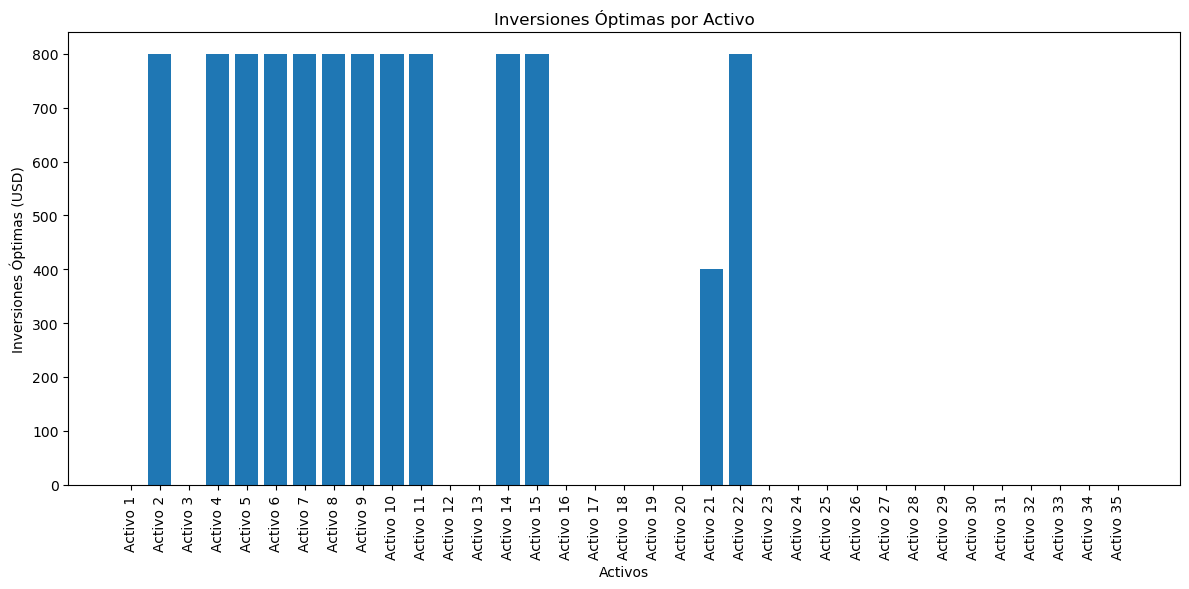

In [60]:
import matplotlib.pyplot as plt

# Datos de las inversiones óptimas por activo
activos = [
    "Activo 1", "Activo 2", "Activo 3", "Activo 4", "Activo 5",
    "Activo 6", "Activo 7", "Activo 8", "Activo 9", "Activo 10",
    "Activo 11", "Activo 12", "Activo 13", "Activo 14", "Activo 15",
    "Activo 16", "Activo 17", "Activo 18", "Activo 19", "Activo 20",
    "Activo 21", "Activo 22", "Activo 23", "Activo 24", "Activo 25",
    "Activo 26", "Activo 27", "Activo 28", "Activo 29", "Activo 30",
    "Activo 31", "Activo 32", "Activo 33", "Activo 34", "Activo 35"
]

inversiones_optimas = [
    0.00, 800.00, 0.00, 800.00, 800.00, 800.00, 800.00, 800.00, 800.00, 800.00,
    800.00, 0.00, 0.00, 800.00, 800.00, 0.00, 0.00, 0.00, 0.00, 0.00,
    400.00, 800.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
    0.00, 0.00, 0.00, 0.00, 0.00
]

# Tomar solo los primeros 35 elementos de ambas listas
activos = activos[:35]
inversiones_optimas = inversiones_optimas[:35]

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(activos, inversiones_optimas)
plt.xlabel("Activos")
plt.ylabel("Inversiones Óptimas (USD)")
plt.title("Inversiones Óptimas por Activo")
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()